156.01439616102374


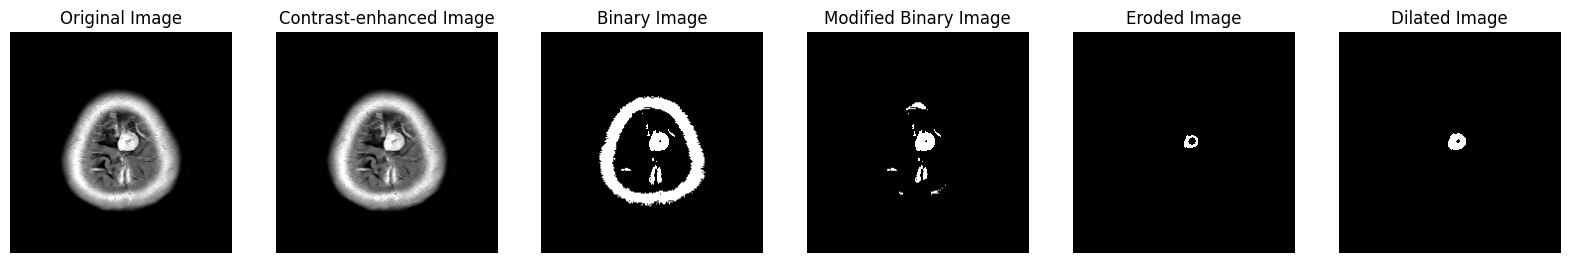

In [24]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, disk

# Load the image using PIL
image_path = "../CNN/dataset/Testing/meningioma/Te-me_0126.jpg"
image = Image.open(image_path)

# Increase contrast using PIL
contrast_factor = 1.3
enhancer = ImageEnhance.Contrast(image)
image_contrasted = enhancer.enhance(contrast_factor)

# Convert PIL Image to OpenCV format
image_contrasted_cv = cv2.cvtColor(np.array(image_contrasted), cv2.COLOR_RGB2BGR)

# Convert the contrast-enhanced image to grayscale using OpenCV
original_image = cv2.cvtColor(image_contrasted_cv, cv2.COLOR_BGR2GRAY)

# Resize the original image to 224x224
resized_image = cv2.resize(original_image, (224, 224))
sum=0
k=0
for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i][j]>20:
            sum=sum+resized_image[i][j]
            k=k+1

t_value=(sum/k)+20

print(t_value)





        
# Convert the resized image to binary
_, binary_image = cv2.threshold(resized_image, t_value, 255, cv2.THRESH_BINARY)

# Convert the binary image to a numpy array
binary_array = np.array(binary_image)

# Apply the horizontal operation
for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1]):
        if j < 100:  # Checking condition similar to j<68
            if binary_array[i, j] == 255:
                for k in range(j, min(binary_array.shape[1], j + 20)):
                    binary_array[i, k] = 0
                break

for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1] - 1, -1, -1):
        if j > 101:  # Checking condition similar to j>224-67
            if binary_array[i, j] == 255:
                for k in range(j, max(0, j - 20), -1):
                    binary_array[i, k] = 0
                break

# vertical operation
for i in range(30):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, min(binary_array.shape[0], i + 20)):
                binary_array[k, j] = 0

for i in range(binary_array.shape[0] - 1, binary_array.shape[0] - 60, -1):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, max(0, i - 20), -1):
                binary_array[k, j] = 0

# Apply erosion and dilation using skimage
eroded_image = binary_erosion(binary_array, disk(3))
dilated_image = binary_dilation(eroded_image, disk(2))

# Display the images
plt.figure(figsize=(20,5))

# Original Image
plt.subplot(1, 6, 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Contrast-enhanced Image
plt.subplot(1, 6, 2)
plt.imshow(image_contrasted, cmap='gray')
plt.title('Contrast-enhanced Image')
plt.axis('off')

# Binary Image
plt.subplot(1, 6, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Modified Binary Image after horizontal 
plt.subplot(1, 6, 4)
plt.imshow(binary_array, cmap='gray')
plt.title('Modified Binary Image')
plt.axis('off')

# Eroded Image
plt.subplot(1, 6, 5)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Dilated Image
plt.subplot(1, 6, 6)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()



80.48861191181844
0


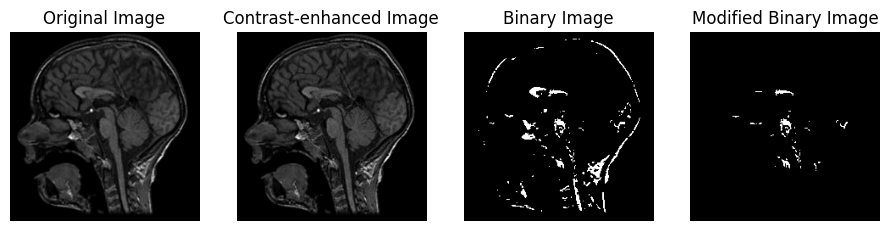

In [6]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, disk
from collections import deque

# Load the image using PIL
image_path = "../CNN/dataset/Testing/notumor/Te-no_0038.jpg"
image = Image.open(image_path)

# Increase contrast using PIL
contrast_factor = 1.32
enhancer = ImageEnhance.Contrast(image)
image_contrasted = enhancer.enhance(contrast_factor)

# Convert PIL Image to OpenCV format
image_contrasted_cv = cv2.cvtColor(np.array(image_contrasted), cv2.COLOR_RGB2BGR)

# Convert the contrast-enhanced image to grayscale using OpenCV
original_image = cv2.cvtColor(image_contrasted_cv, cv2.COLOR_BGR2GRAY)

# Resize the original image to 224x224
resized_image = cv2.resize(original_image, (224, 224))

sum=0
k=0
for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i][j]>20:
            sum=sum+resized_image[i][j]
            k=k+1

t_value=(sum/k)+30

print(t_value)
# Convert the resized image to binary
_, binary_image = cv2.threshold(resized_image, t_value, 255, cv2.THRESH_BINARY)

# Convert the binary image to a numpy array
binary_array = np.array(binary_image)

# Apply the horizontal operation
for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1]):
        if j < 100:  # Checking condition similar to j<68
            if binary_array[i, j] == 255:
                for k in range(j, min(binary_array.shape[1], j + 20)):
                    binary_array[i, k] = 0
                break

for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1] - 1, -1, -1):
        if j > 101:  # Checking condition similar to j>224-67
            if binary_array[i, j] == 255:
                for k in range(j, max(0, j - 20), -1):
                    binary_array[i, k] = 0
                break

# vertical operation
for i in range(30):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, min(binary_array.shape[0], i + 15)):
                binary_array[k, j] = 0

for i in range(binary_array.shape[0] - 1, binary_array.shape[0] - 60, -1):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, max(0, i - 20), -1):
                binary_array[k, j] = 0

# Apply erosion and dilation using skimage
eroded_image = binary_erosion(binary_array, disk(4))

dilated_image = binary_dilation(eroded_image, disk(2.5))

# Check if the dilated image contains some white cells or not 
sum = 0
for i in range(dilated_image.shape[0]):
    for j in range(dilated_image.shape[1]):
        if dilated_image[i, j] == 1:
            sum += 1


if sum>15:
    ans="dilated"
else:
    ans="binary"

print(sum)

def bfs(image, visited, start_x, start_y):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)]
    cluster_size = 0
    cluster_indices = []
    
    queue = deque([(start_x, start_y)])
    visited[start_x][start_y] = True
    
    while queue:
        x, y = queue.popleft()
        cluster_size += 1
        cluster_indices.append((x, y))
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1] and image[nx][ny] == 1 and not visited[nx][ny]:
                queue.append((nx, ny))
                visited[nx][ny] = True
    
    return cluster_size, cluster_indices

def find_largest_cluster(image):
    visited = np.zeros_like(image, dtype=bool)
    largest_cluster_size = 0
    largest_cluster_indices = []
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1 and not visited[i][j]:
                cluster_size, cluster_indices = bfs(image, visited, i, j)
                if cluster_size > largest_cluster_size:
                    largest_cluster_size = cluster_size
                    largest_cluster_indices = cluster_indices
    
    # Create a new image with only the pixels from the largest cluster set to 1
    new_image = np.zeros_like(image)
    for idx in largest_cluster_indices:
        new_image[idx[0]][idx[1]] = 1
    
    return largest_cluster_size, largest_cluster_indices, new_image


    
largest_cluster_size, largest_cluster_indices, updated_image = find_largest_cluster(dilated_image)



image=binary_image


def connected_pixels(image, start_index):
    height, width = len(image), len(image[0])
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up

    # Function to check if a pixel is within the bounds of the image
    def is_valid(x, y):
        return 0 <= x < height and 0 <= y < width

    # Initialize visited array and queue for BFS
    visited = [[False] * width for _ in range(height)]
    queue = deque([start_index])
    visited[start_index[0]][start_index[1]] = True

    connected_pixels_indices = []

    while queue:
        x, y = queue.popleft()
        connected_pixels_indices.append((x, y))

        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if is_valid(new_x, new_y) and not visited[new_x][new_y] and image[new_x][new_y] == 255:
                queue.append((new_x, new_y))
                visited[new_x][new_y] = True

    return connected_pixels_indices


if ans=='dilated':
    size = len(largest_cluster_indices) // 2
    idx = largest_cluster_indices[size]
    values=connected_pixels(binary_image, idx)


def visualize_connected_pixels(image, connected_pixels_indices):
    # Create a copy of the image to modify
    modified_image = np.array(image)

    # Set pixels at connected indices to 255 and others to 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (i, j) in connected_pixels_indices:
                modified_image[i][j] = 255
            else:
                modified_image[i][j] = 0
    return modified_image

    
final_image=visualize_connected_pixels(image, values)








# Display the images
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 7, 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Contrast-enhanced Image
plt.subplot(1, 7, 2)
plt.imshow(image_contrasted, cmap='gray')
plt.title('Contrast-enhanced Image')
plt.axis('off')

# Binary Image
plt.subplot(1, 7, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Modified Binary Image after horizontal
plt.subplot(1, 7, 4)
plt.imshow(binary_array, cmap='gray')
plt.title('Modified Binary Image')
plt.axis('off')

# Eroded Image

# Dilated Image if it contains at least 2 white pixel
if sum>10:
    plt.subplot(1, 7, 5)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    plt.subplot(1, 7, 6)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')
    plt.subplot(1, 7, 7)
    plt.axis('off')
    plt.title('final image of tumor')
    plt.imshow(updated_image, cmap='gray')  
    plt.show()

    
    plt.title('final image of tumor')
    plt.imshow(final_image, cmap='gray')
    plt.axis('off')
    plt.show()

#  change the erodeation for different tumor and segment it for menignoma it is 4.2 and for others also check that befor finding the largest cluster
# make sure that the edges upto 20% is cleared
# eroded for pituitary is 2 and 


# after final image of tumor then store its any pixel value where tumor is there then go to binary image and do conncectede component algo or any other
# other which will mark the neighbour with same pixel value and  make that region any rcb color and overlay it on ral image in that way we can do 
# tumor classification for meningioma

222


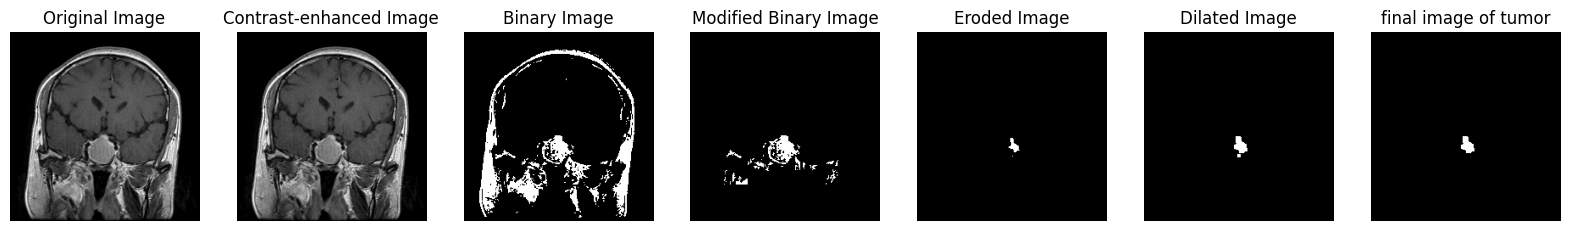

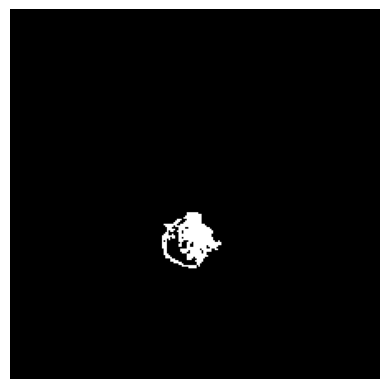

In [9]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, disk
from collections import deque

# Load the image using PIL
image_path = "../CNN/dataset/Training/pituitary/Tr-pi_0820.jpg"
image = Image.open(image_path)

# Increase contrast using PIL
contrast_factor = 1.3
enhancer = ImageEnhance.Contrast(image)
image_contrasted = enhancer.enhance(contrast_factor)

# Convert PIL Image to OpenCV format
image_contrasted_cv = cv2.cvtColor(np.array(image_contrasted), cv2.COLOR_RGB2BGR)

# Convert the contrast-enhanced image to grayscale using OpenCV
original_image = cv2.cvtColor(image_contrasted_cv, cv2.COLOR_BGR2GRAY)

# Resize the original image to 224x224
resized_image = cv2.resize(original_image, (224, 224))

# Convert the resized image to binary
_, binary_image = cv2.threshold(resized_image, 120, 255, cv2.THRESH_BINARY)

# Convert the binary image to a numpy array
binary_array = np.array(binary_image)

# Apply the horizontal operation
for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1]):
        if j < 100:  # Checking condition similar to j<68
            if binary_array[i, j] == 255:
                for k in range(j, min(binary_array.shape[1], j + 20)):
                    binary_array[i, k] = 0
                break

for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1] - 1, -1, -1):
        if j > 101:  # Checking condition similar to j>224-67
            if binary_array[i, j] == 255:
                for k in range(j, max(0, j - 20), -1):
                    binary_array[i, k] = 0
                break

# vertical operation
for i in range(30):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, min(binary_array.shape[0], i + 15)):
                binary_array[k, j] = 0

for i in range(binary_array.shape[0] - 1, binary_array.shape[0] - 60, -1):
    for j in range(68, 157):
        if binary_array[i, j] == 255:
            for k in range(i, max(0, i - 20), -1):
                binary_array[k, j] = 0

for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1]):
        if i<56:
            binary_array[i][j]=0

for i in range(binary_array.shape[0]):
    for j in range(binary_array.shape[1]):
        if i>180:
            binary_array[i][j]=0
            
for i in range(0,60):
    for j in range(0,224):
        binary_array[i][j]=0



# Apply erosion and dilation using skimage
eroded_image = binary_erosion(binary_array, disk(3))

dilated_image = binary_dilation(eroded_image, disk(2.5))

# Check if the dilated image contains some white cells or not 
sum = 0
for i in range(dilated_image.shape[0]):
    for j in range(dilated_image.shape[1]):
        if dilated_image[i, j] == 1:
            sum += 1


if sum>15:
    ans=dilated_image
else:
    ans=binary_array

print(sum)

def bfs(image, visited, start_x, start_y):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (1, -1), (-1, -1)]
    cluster_size = 0
    cluster_indices = []
    
    queue = deque([(start_x, start_y)])
    visited[start_x][start_y] = True
    
    while queue:
        x, y = queue.popleft()
        cluster_size += 1
        cluster_indices.append((x, y))
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1] and image[nx][ny] == 1 and not visited[nx][ny]:
                queue.append((nx, ny))
                visited[nx][ny] = True
    
    return cluster_size, cluster_indices

def find_largest_cluster(image):
    visited = np.zeros_like(image, dtype=bool)
    largest_cluster_size = 0
    largest_cluster_indices = []
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] == 1 and not visited[i][j]:
                cluster_size, cluster_indices = bfs(image, visited, i, j)
                if cluster_size > largest_cluster_size:
                    largest_cluster_size = cluster_size
                    largest_cluster_indices = cluster_indices
    
    # Create a new image with only the pixels from the largest cluster set to 1
    new_image = np.zeros_like(image)
    for idx in largest_cluster_indices:
        new_image[idx[0]][idx[1]] = 1
    
    return largest_cluster_size, largest_cluster_indices, new_image


    
largest_cluster_size, largest_cluster_indices, updated_image = find_largest_cluster(dilated_image)


# Display the images
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 7, 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Contrast-enhanced Image
plt.subplot(1, 7, 2)
plt.imshow(image_contrasted, cmap='gray')
plt.title('Contrast-enhanced Image')
plt.axis('off')

# Binary Image
plt.subplot(1, 7, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Modified Binary Image after horizontal
plt.subplot(1, 7, 4)
plt.imshow(binary_array, cmap='gray')
plt.title('Modified Binary Image')
plt.axis('off')

# Eroded Image

# Dilated Image if it contains at least 2 white pixel
if sum>10:
    plt.subplot(1, 7, 5)
    plt.imshow(eroded_image, cmap='gray')
    plt.title('Eroded Image')
    plt.axis('off')
    plt.subplot(1, 7, 6)
    plt.imshow(dilated_image, cmap='gray')
    plt.title('Dilated Image')
    plt.axis('off')
    plt.subplot(1, 7, 7)
    plt.axis('off')
    plt.title('final image of tumor')
    plt.imshow(updated_image, cmap='gray')  
    plt.show()

plt.show()

image=binary_image


def connected_pixels(image, start_index):
    height, width = len(image), len(image[0])
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up

    # Function to check if a pixel is within the bounds of the image
    def is_valid(x, y):
        return 0 <= x < height and 0 <= y < width

    # Initialize visited array and queue for BFS
    visited = [[False] * width for _ in range(height)]
    queue = deque([start_index])
    visited[start_index[0]][start_index[1]] = True

    connected_pixels_indices = []

    while queue:
        x, y = queue.popleft()
        connected_pixels_indices.append((x, y))

        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if is_valid(new_x, new_y) and not visited[new_x][new_y] and image[new_x][new_y] == 255:
                queue.append((new_x, new_y))
                visited[new_x][new_y] = True

    return connected_pixels_indices



size = len(largest_cluster_indices) // 2
idx = largest_cluster_indices[size]
values=connected_pixels(binary_image, idx)


def visualize_connected_pixels(image, connected_pixels_indices):
    # Create a copy of the image to modify
    modified_image = np.array(image)

    # Set pixels at connected indices to 255 and others to 0
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (i, j) in connected_pixels_indices:
                modified_image[i][j] = 255
            else:
                modified_image[i][j] = 0

    # Display the modified image
    plt.imshow(modified_image, cmap='gray')
    plt.axis('off')
    plt.show()
visualize_connected_pixels(image, values)

#  change the erodeation for different tumor and segment it for menignoma it is 4.2 and for others also check that befor finding the largest cluster
# make sure that the edges upto 20% is cleared
# eroded for pituitary is 2 and 


# after final image of tumor then store its any pixel value where tumor is there then go to binary image and do conncectede component algo or any other
# other which will mark the neighbour with same pixel value and  make that region any rcb color and overlay it on ral image in that way we can do 
# tumor classification for meningioma

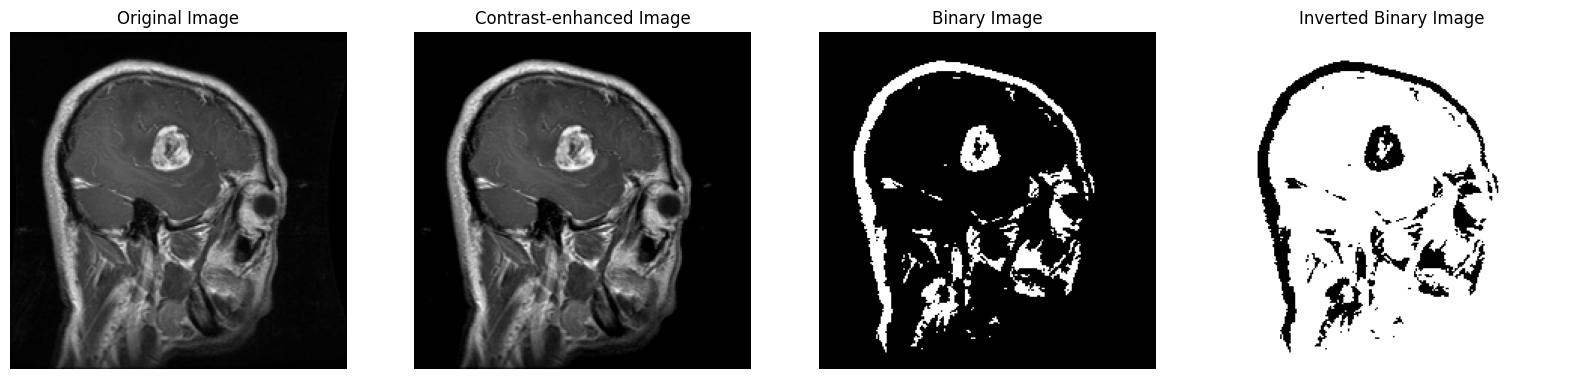

In [10]:
# giloma 
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation, disk
from collections import deque

# Load the image using PIL
image_path = "../CNN/dataset/Training/glioma/Tr-gl_0691.jpg"
image = Image.open(image_path)


# Resize the image to 224x224
resized_image = image.resize((224, 224))

# Increase contrast using PIL
contrast_factor = 1.32
enhancer = ImageEnhance.Contrast(resized_image)
image_contrasted = enhancer.enhance(contrast_factor)

# Convert PIL Image to OpenCV format
image_contrasted_cv = cv2.cvtColor(np.array(image_contrasted), cv2.COLOR_RGB2BGR)

# Convert the contrast-enhanced image to grayscale using OpenCV
original_image = cv2.cvtColor(image_contrasted_cv, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to binary
_, binary_image = cv2.threshold(original_image, 120, 255, cv2.THRESH_BINARY)

# Invert the binary image
binary_image_inverted = 255 - binary_image

# Display the images
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1,4 , 1)
plt.imshow(resized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Contrast-enhanced Image
plt.subplot(1, 4, 2)
plt.imshow(image_contrasted, cmap='gray')
plt.title('Contrast-enhanced Image')
plt.axis('off')

# Binary Image
plt.subplot(1, 4, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Inverted Binary Image
plt.subplot(1, 4, 4)
plt.imshow(binary_image_inverted, cmap='gray')
plt.title('Inverted Binary Image')
plt.axis('off')

plt.show()


